In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
df = pd.read_csv('student-mat.csv')
df_clean = pd.read_csv('cleandata.csv')

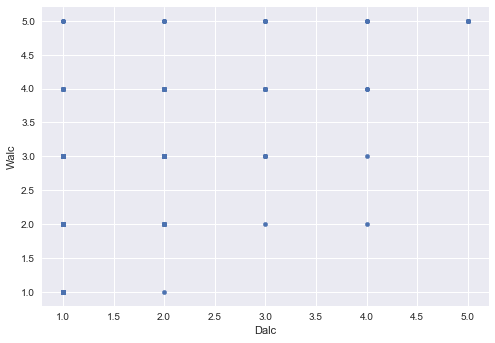

In [22]:
df.plot.scatter('Dalc', 'Walc')
plt.show()

school


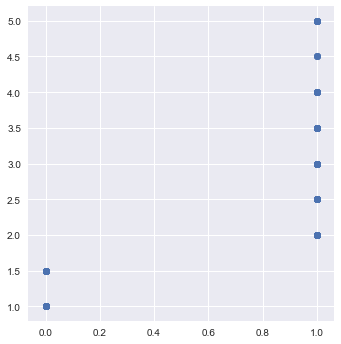

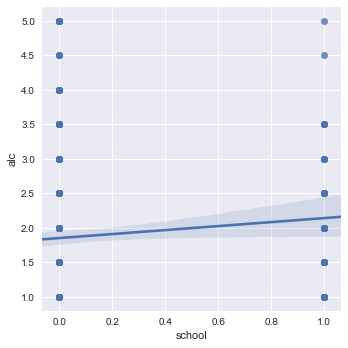

sex


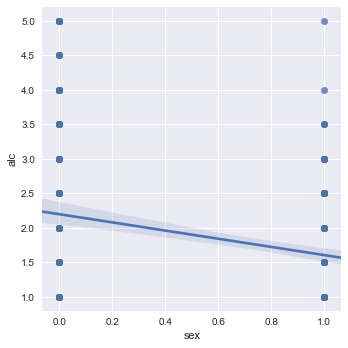

age


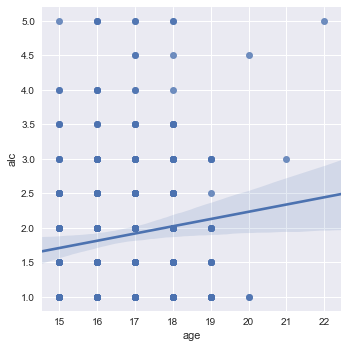

address


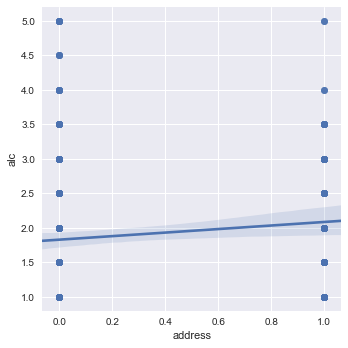

famsize


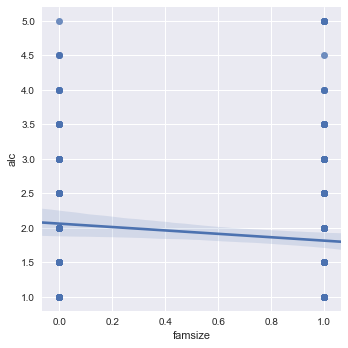

Pstatus


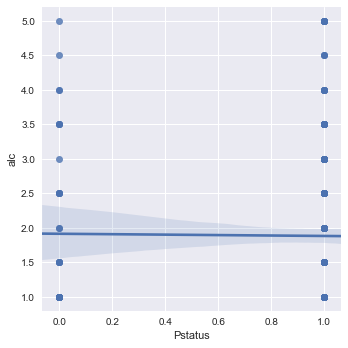

Medu


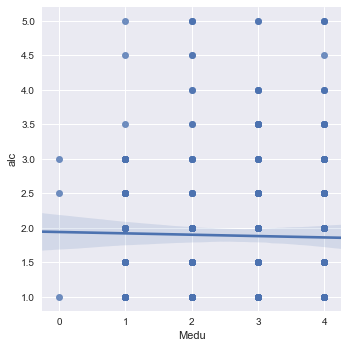

Fedu


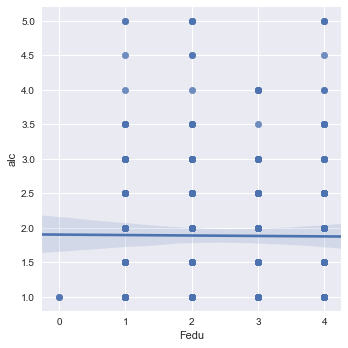

traveltime


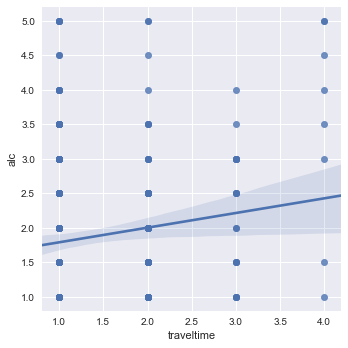

studytime


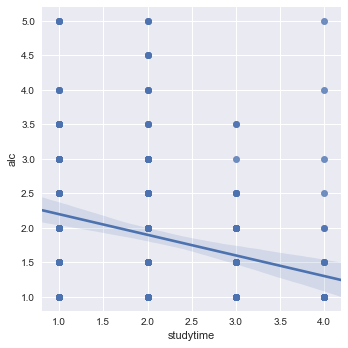

failures


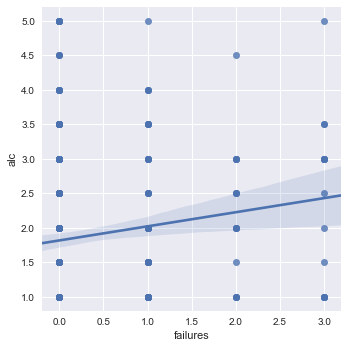

schoolsup


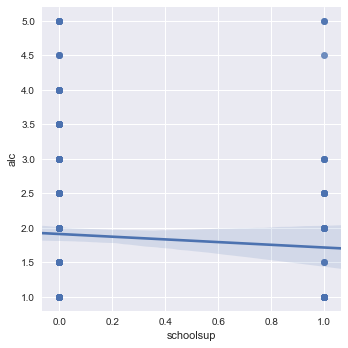

famsup


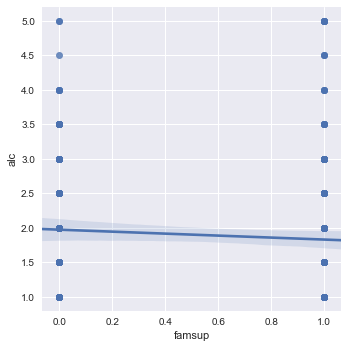

paid


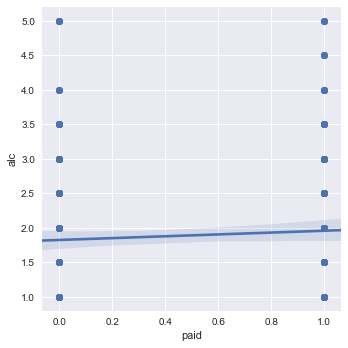

activities


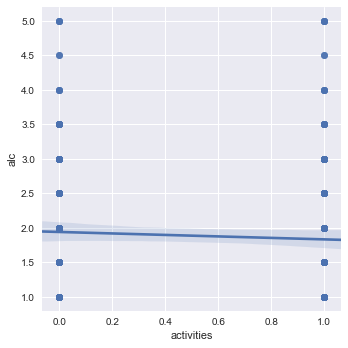

nursery


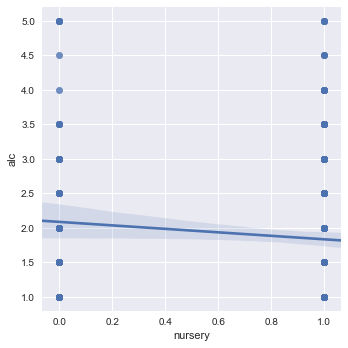

higher


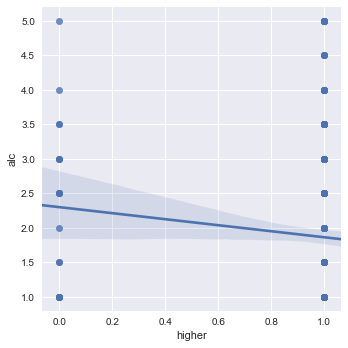

internet


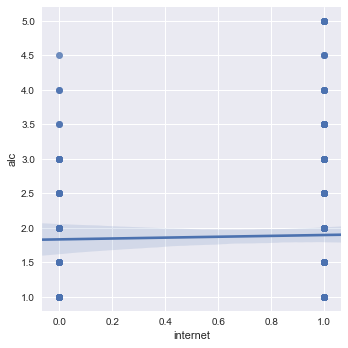

romantic


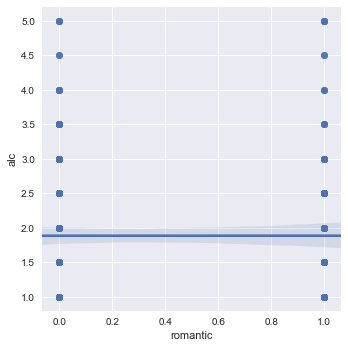

famrel


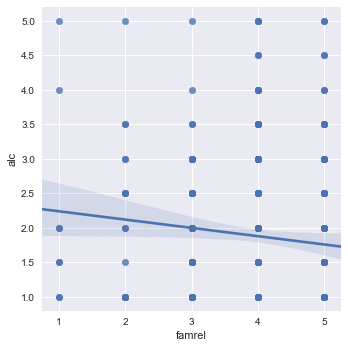

freetime


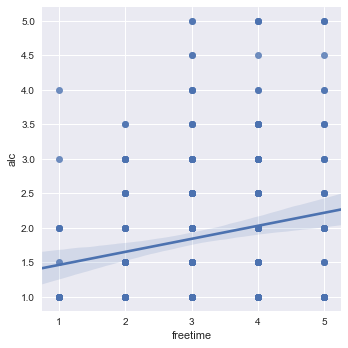

goout


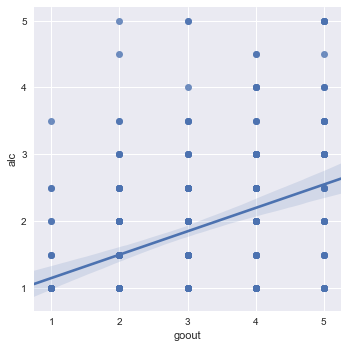

health


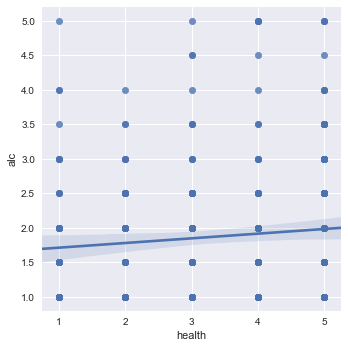

absences


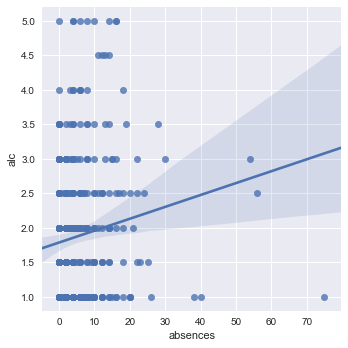

G1


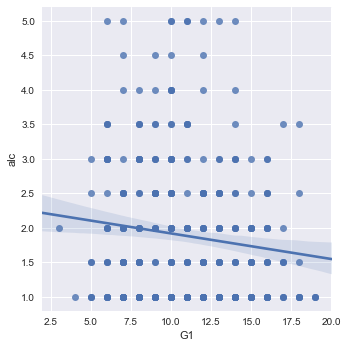

G2


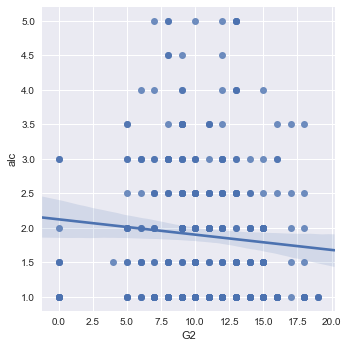

G3


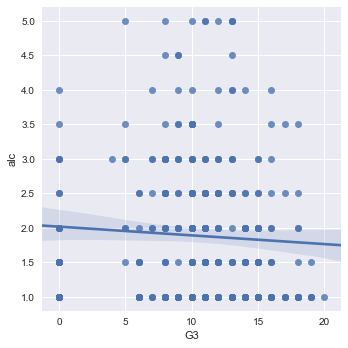

alc


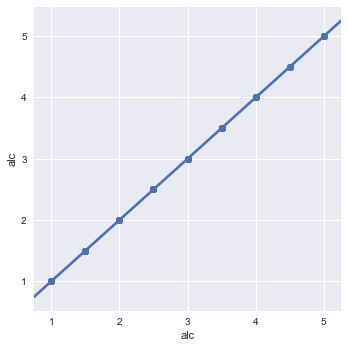

drinker


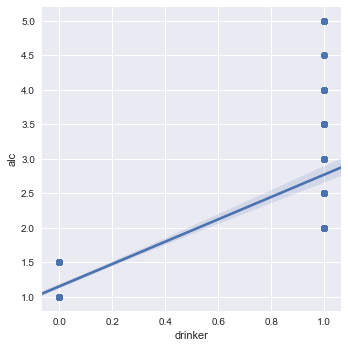

In [25]:
import seaborn as sns
for column in df_clean:
    print column
    try:
        sns.lmplot(x=column, y='alc',data=df_clean,fit_reg=True) 
        #df.plot.scatter(column, 'Dalc')
        plt.show()
    except:
        pass

In [65]:
import math
def CELoss(pred, target):
    return - target * math.log(pred) - (1-target) * math.log(1-pred)
def SquareLoss(pred, target):
    return (target-pred)**2

def ModelError(pred, target, loss):
    return sum([loss(pred[row:row+1,:], target[row:row+1,:]) for row in range(len(pred))])

def CrossValidationError(x, y, model, folds=10, retry_count=1):
    nsample = len(x)
    
    if folds <= 0:
        folds = nsample

    sum_err = 0.
    for _ in range(retry_count):
        order = np.random.permutation(len(x))
        for fold in range(folds):
            start = (nsample*fold)/(folds)
            end = (nsample * (fold+1))/(folds)
            
            train_indices = list(order[:start]) + list(order[end:])
            test_indices = list(order[start:end])
            
            model.fit(x[train_indices], y[train_indices])
            
            sum_err += ModelError(model.predict(x[test_indices]), y[test_indices], SquareLoss)
    return sum_err / retry_count

In [87]:
from sklearn import linear_model

xlist = []
col_list = [col for col in df_clean]
col_list.remove('drinker')
col_list.remove('alc')
for col in col_list:
    xlist += [df_clean[col].values.reshape(-1, 1)]
x = np.concatenate(xlist, axis=1)   
#x = data['famrel', 'freetime'].values
y = df_clean['alc'].values.reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)
qualities = []
for idx, col in enumerate(col_list):
    coef = regr.coef_[0,idx]
    std = df_clean[col].std()
    #print 'quality of %s: %f' % (col, abs(coef*std))
    qualities += [(abs(coef*std), col)]
qualities.sort(reverse=True)
for quality, name in qualities:
    print 'quality of %s: %f' % (name, quality)
print regr.coef_

# plot it as in the example at http://scikit-learn.org/
loss = SquareLoss
error = sum([loss(regr.predict(x[row:row+1,:])[0,0], y[row,0]) for row in range(len(x))])
cross_val_error = CrossValidationError(x, y, regr, folds=0)
naive_error = (sum(y**2) - sum(y)**2/len(y))
print 'error = %f' % error
print 'cross_val error = %f' % cross_val_error
print 'naive error = %f' % naive_error
print 'explained: %f%%' % ((naive_error - cross_val_error)*100./naive_error)


quality of goout: 0.342093
quality of sex: 0.235093
quality of G1: 0.171541
quality of paid: 0.154217
quality of famrel: 0.142719
quality of G2: 0.116893
quality of absences: 0.114923
quality of studytime: 0.103937
quality of address: 0.099526
quality of nursery: 0.095251
quality of traveltime: 0.085674
quality of health: 0.078688
quality of famsize: 0.077273
quality of activities: 0.076908
quality of Fedu: 0.062477
quality of freetime: 0.061228
quality of age: 0.055339
quality of famsup: 0.052938
quality of Medu: 0.043702
quality of failures: 0.043047
quality of G3: 0.036109
quality of internet: 0.011516
quality of higher: 0.010777
quality of school: 0.003567
quality of schoolsup: 0.002364
quality of romantic: 0.001951
quality of Pstatus: 0.000986
[[-0.01110446 -0.47025592  0.04336751  0.23887562 -0.17032081  0.00322716
  -0.03991978  0.05741272  0.12282975 -0.12384707  0.05788568 -0.00704025
  -0.10853301  0.30912476 -0.15364504 -0.23561865  0.0490935   0.03082995
  -0.00413189 -0.15